<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/ULMFiT_Malayalam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/Mal_sentiment_full_train.tsv', sep="\t")
train

,text,category
0,Sunny chechi fans evide like adichu power kani...,unknown_state
1,Angane july month ile ende aadyathe leave njan...,Positive
2,ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...,unknown_state
3,ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........,Positive
4,Trailer powli oru raksha illa . Pakshea padam ...,Positive
...,...,...
15883,Minimum 10 thavana kandavar maathram like adi,unknown_state
15884,Please cinema kaannaaan kothi aakunnu onnu rel...,Positive
15885,USA ok.. India No... Sadhacharam,unknown_state
15886,nama hero december 12 wait & see mamamaga mah...,Positive


In [4]:
val=pd.read_csv('/content/Mal_sentiment_full_dev.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,text,category
0,Mammooka ninghal mass aa pwoli item,Positive
1,Waiting for Malayalam movie For Tamil paiyan,not-malayalam
2,ദളപതി ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ...,Positive
3,#Trailer pwolichuuuu ഓണത്തിന് വന്നങ്ങു തകർത്തേ...,Positive
4,Mammoookkaaaa polichadukkiii katta waiting nv 21,Positive
...,...,...
1761,Aa ചിരി uff എന്റെ പൊന്നോ ഇക്ക vere ലെവൽ,Positive
1762,Katta katta katta katta waiting....cant wait man,Positive
1763,Arjun reddy bgm poole thonniyathu enniku mathr...,unknown_state
1764,Fahad ikka ithilum polikum en urappayi,Positive


In [5]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [6]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [7]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Sunny chechi fans evide like adichu power kani...
1            Positive  Angane july month ile ende aadyathe leave njan...
2       unknown_state  ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്ന...
3            Positive  ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു..........
4            Positive  Trailer powli oru raksha illa . Pakshea padam ...
...               ...                                                ...
15883   unknown_state      Minimum 10 thavana kandavar maathram like adi
15884        Positive  Please cinema kaannaaan kothi aakunnu onnu rel...
15885   unknown_state                   USA ok.. India No... Sadhacharam
15886        Positive  nama hero december 12 wait & see  mamamaga mah...
15887  Mixed_feelings  Madhuraraja 1 hour 40 k likes  Lucifer 1 min 4...

[15888 rows x 2 columns]
           category                                               text
0          Positive        

In [8]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [9]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [10]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (15888 items)
x: LMTextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (1766 items)
x: LMTextList
xxbos xxmaj mammooka ninghal mass aa pwoli item,xxbos xxmaj waiting for xxmaj malayalam movie xxmaj for xxmaj tamil xxunk,xxbos xxunk ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ ...,xxbos xxmaj trailer pwolich xxrep 4 u ഓണത്തിന് xxunk xxunk xxrep 4 .,xxbos xxmaj mammoookk xxrep 4 a xxunk katta waiting nv 21
y: LMLabelList
,,,,
Path: .;

Test: None>

In [11]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-02
Min loss divided by 10: 1.00E-01


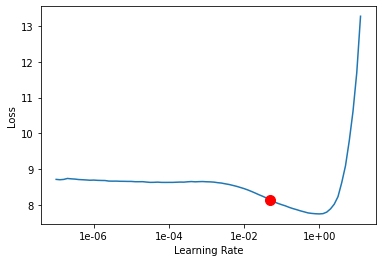

In [12]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [13]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.269326,5.024461,0.292262,00:09
1,5.228948,4.778834,0.312016,00:09


In [14]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.621496,4.661043,0.318824,00:12
1,4.223340,4.514382,0.332403,00:12
2,3.486980,4.647175,0.327604,00:13


In [15]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 2.75E-05


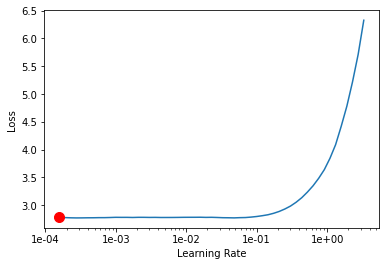

In [16]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [17]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.852019,4.701253,0.325074,00:11
1,2.698175,4.755013,0.321094,00:11
2,2.434724,4.765618,0.322284,00:10


In [18]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-03
Min loss divided by 10: 1.10E-03


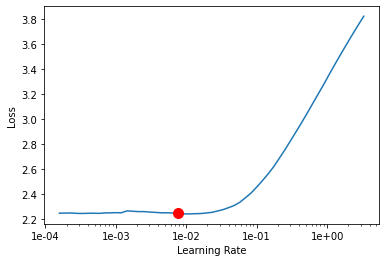

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.305749,4.928885,0.317039,00:11
1,2.223146,4.984797,0.315737,00:11
2,2.026515,5.033001,0.316629,00:11


In [21]:
#save the encoder model
learn.save_encoder('my_encoder')

In [22]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [23]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (15888 items)
x: TextList
xxbos xxmaj sunny chechi fans evide like adichu power xxunk 🤣 🤣,xxbos xxmaj angane july month ile ende xxunk leave njan angu edukuva xxmaj july 5 nu,xxbos ഏട്ടന്റെ പുതിയ പടത്തിനു വേണ്ടി കാത്തിരിക്കുന്നവർ ലൈക്‌ ബട്ടൺ അടിച്ചു xxunk xxrep 11 -,xxbos ഇനി ലാലേട്ടന്റെ വേട്ട തുടങ്ങാൻ പോകുന്നു xxrep 7 . മുൻ കാല collection recordukal xxunk,xxbos xxmaj trailer powli oru raksha illa . xxmaj xxunk padam xxunk xxunk over degrade venda padam xxunk paraya
y: CategoryList
unknown_state,Positive,unknown_state,Positive,Positive
Path: .;

Valid: LabelList (1766 items)
x: TextList
xxbos xxmaj mammooka ninghal mass aa pwoli item,xxbos xxmaj waiting for xxmaj malayalam movie xxmaj for xxmaj tamil xxunk,xxbos xxunk ഫാൻസിന്റെ വക ഒരു ഒന്നൊന്നര വിജയാശംസകൾ ...,xxbos xxmaj trailer pwolich xxrep 4 u ഓണത്തിന് xxunk xxunk xxrep 4 .,xxbos xxmaj mammoookk xxrep 4 a xxunk katta waiting nv 21
y: CategoryList
Positive,not-malayalam,Positive,Po

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 1.45E-02


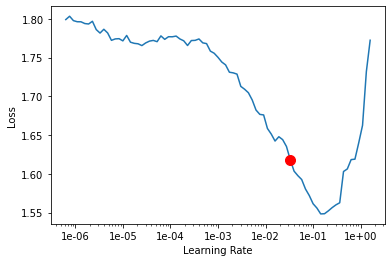

In [24]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [25]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.076203,1.027000,0.593431,0.443114,00:09
1,1.042134,0.967222,0.617780,0.544708,00:09
2,0.996511,0.939836,0.625708,0.558736,00:09


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

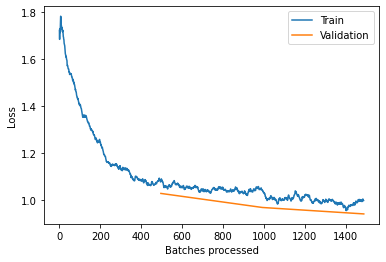

In [26]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 3.31E-07


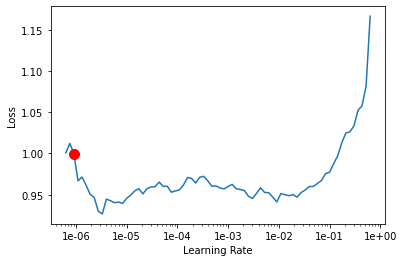

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [28]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.982791,0.930091,0.630804,0.535766,00:10
1,0.912266,0.886390,0.646093,0.586926,00:10


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


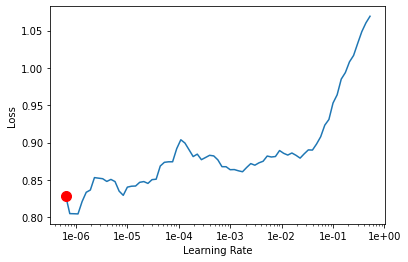

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.916296,0.869744,0.671008,0.581230,00:16
1,0.750775,0.825112,0.679502,0.617137,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [31]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.748215,0.817901,0.685730,0.611270,00:21
1,0.571336,0.810159,0.697622,0.639645,00:22


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.598519,0.851992,0.689694,0.626394,00:23
1,0.428104,0.884842,0.692526,0.636665,00:23


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.357656,0.945874,0.687995,0.620516,00:23
1,0.317759,0.975633,0.696489,0.639652,00:23
2,0.284064,0.978711,0.694790,0.640083,00:24


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [32]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [33]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,32,9,8,1,12
1,11,132,42,3,45
2,36,45,540,13,98
3,0,4,20,112,14
4,23,47,96,12,411


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 32   9   8   1  12]
 [ 11 132  42   3  45]
 [ 36  45 540  13  98]
 [  0   4  20 112  14]
 [ 23  47  96  12 411]]
0.6947904869762175


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.3137    0.5161    0.3902        62
           1     0.5570    0.5665    0.5617       233
           2     0.7649    0.7377    0.7510       732
           3     0.7943    0.7467    0.7698       150
           4     0.7086    0.6978    0.7032       589

    accuracy                         0.6948      1766
   macro avg     0.6277    0.6530    0.6352      1766
weighted avg     0.7053    0.6948    0.6990      1766

